在cuda:0上训练
Epoch:1, 训练损失:2.321, 训练准确率:0.099, 测试准确率:0.100
Epoch:2, 训练损失:2.302, 训练准确率:0.104, 测试准确率:0.168
Epoch:3, 训练损失:1.321, 训练准确率:0.488, 测试准确率:0.603
Epoch:4, 训练损失:0.848, 训练准确率:0.668, 测试准确率:0.702
Epoch:5, 训练损失:0.708, 训练准确率:0.723, 测试准确率:0.720
Epoch:6, 训练损失:0.642, 训练准确率:0.749, 测试准确率:0.756
Epoch:7, 训练损失:0.592, 训练准确率:0.769, 测试准确率:0.763
Epoch:8, 训练损失:0.550, 训练准确率:0.788, 测试准确率:0.796
Epoch:9, 训练损失:0.519, 训练准确率:0.800, 测试准确率:0.791
Epoch:10, 训练损失:0.491, 训练准确率:0.814, 测试准确率:0.798
Epoch:11, 训练损失:0.471, 训练准确率:0.823, 测试准确率:0.789
Epoch:12, 训练损失:0.452, 训练准确率:0.830, 测试准确率:0.796
Epoch:13, 训练损失:0.440, 训练准确率:0.834, 测试准确率:0.803
Epoch:14, 训练损失:0.429, 训练准确率:0.841, 测试准确率:0.812
Epoch:15, 训练损失:0.416, 训练准确率:0.846, 测试准确率:0.804
Epoch:16, 训练损失:0.405, 训练准确率:0.850, 测试准确率:0.823
Epoch:17, 训练损失:0.399, 训练准确率:0.852, 测试准确率:0.845
Epoch:18, 训练损失:0.388, 训练准确率:0.856, 测试准确率:0.843
Epoch:19, 训练损失:0.383, 训练准确率:0.858, 测试准确率:0.852
Epoch:20, 训练损失:0.373, 训练准确率:0.862, 测试准确率:0.836
Epoch:21, 训练损失:0.366, 训练准确率:0.864, 测试准确率:0.857
Epoch:22, 训

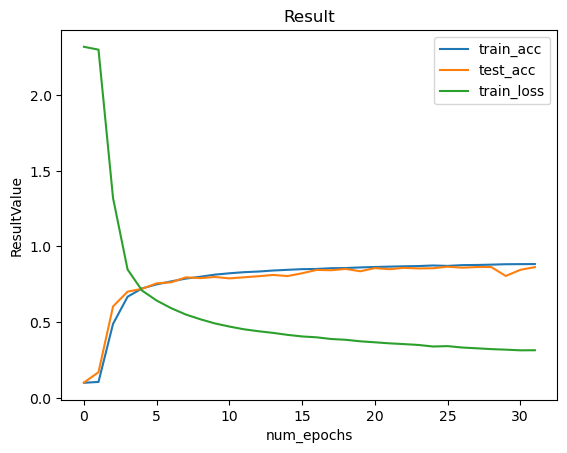

/home/lindenbaum/Documents/Python/DeepLearning/DeepLearning/CNN/st_train.py:224: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, axes = plt.subplots(1, n, figsize=(8, 8))


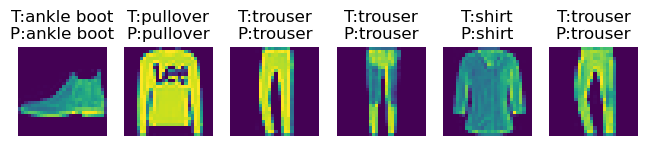

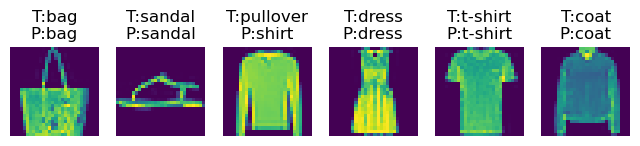

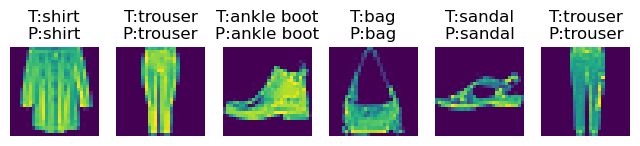

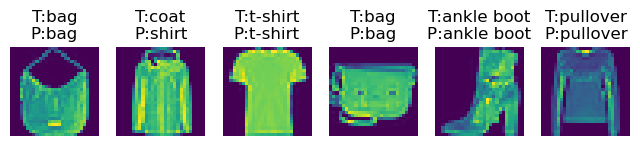

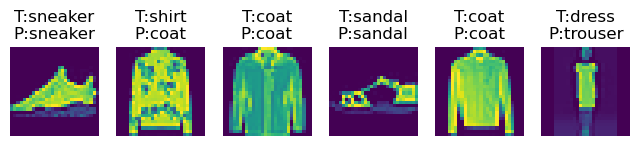

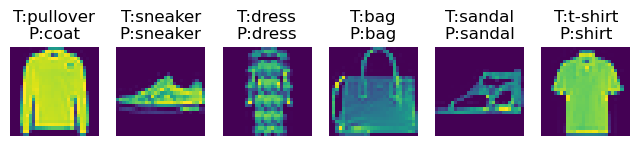

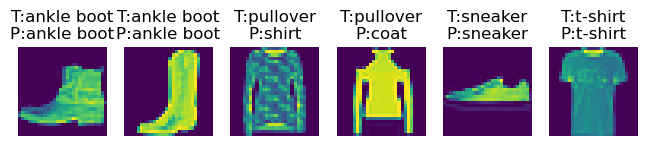

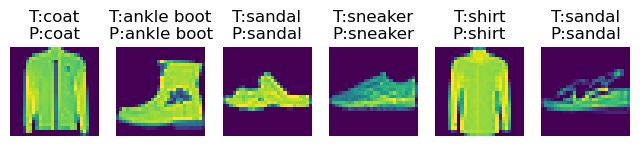

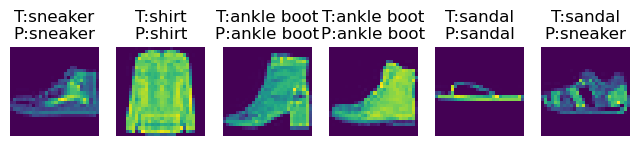

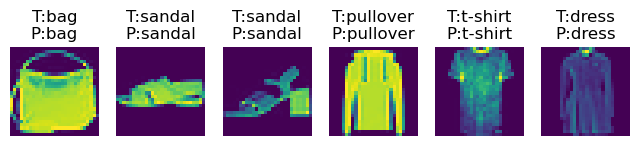

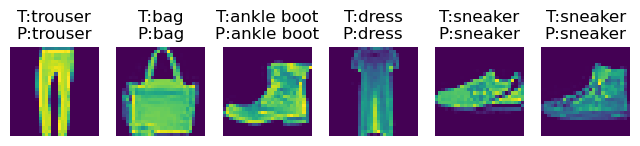

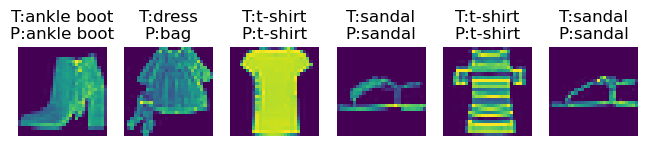

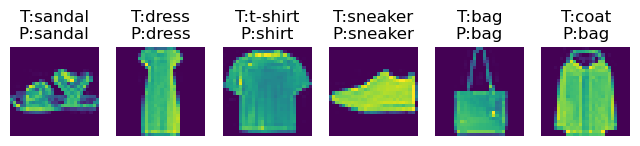

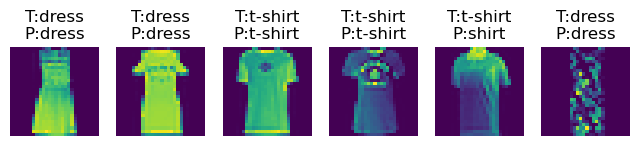

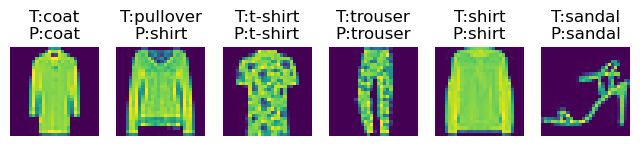

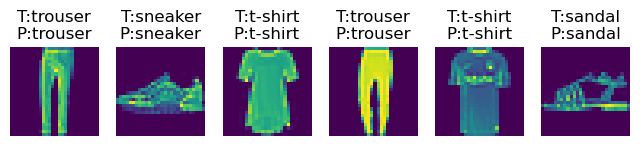

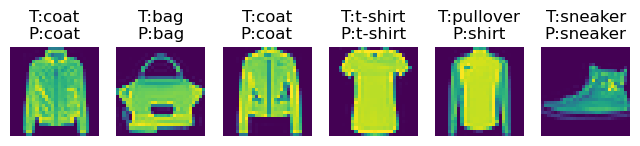

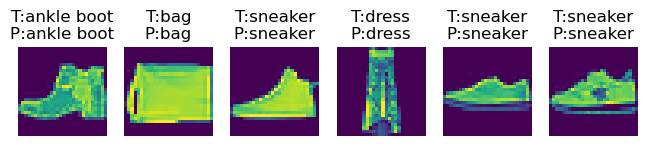

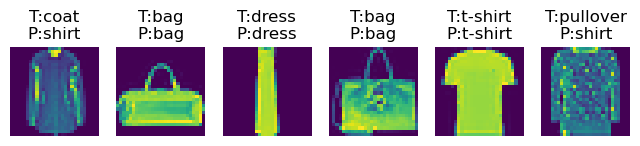

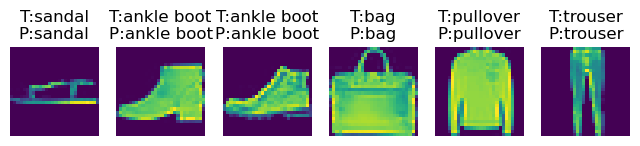

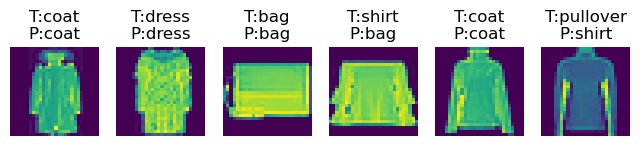

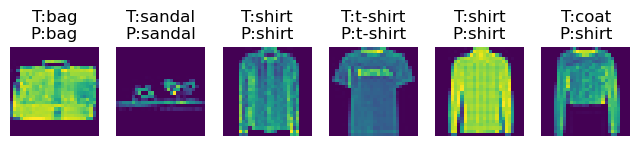

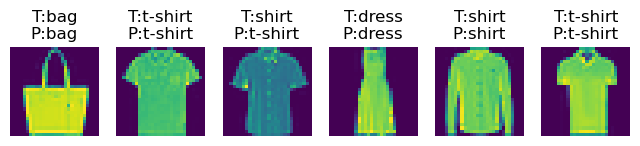

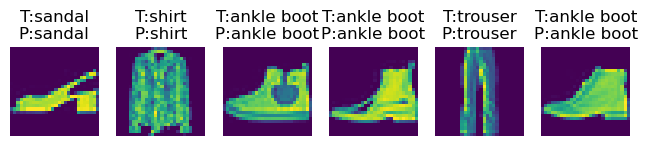

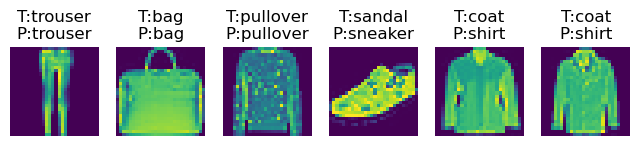

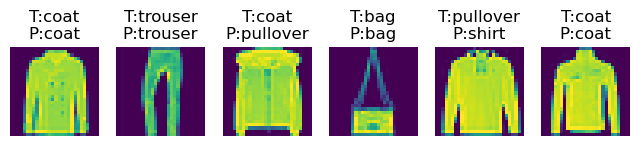

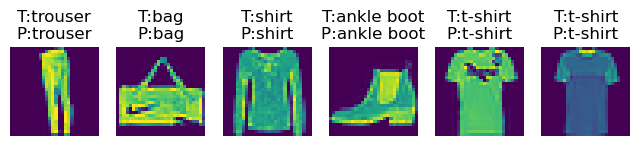

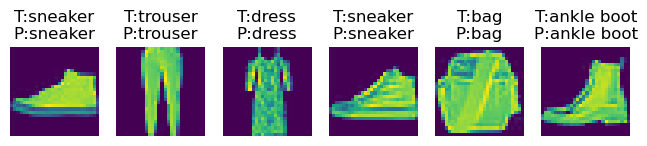

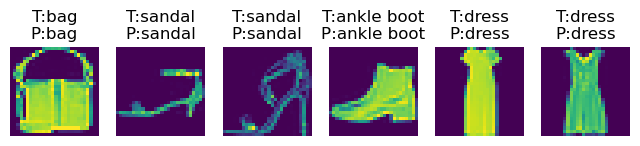

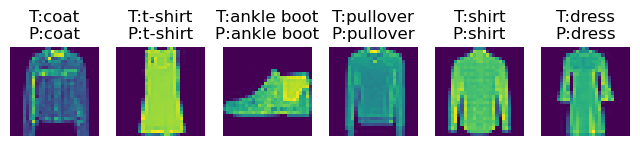

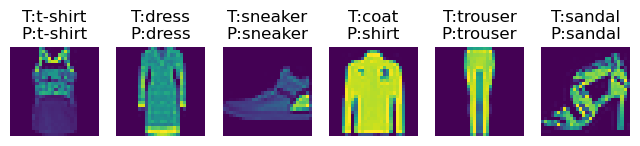

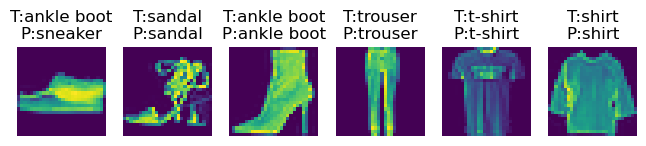

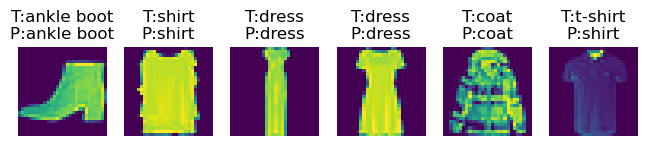

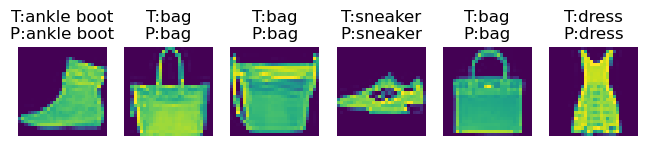

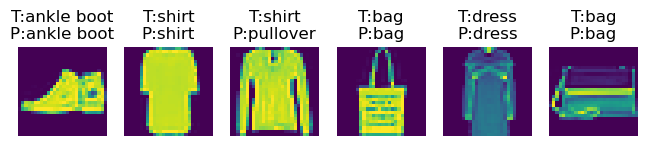

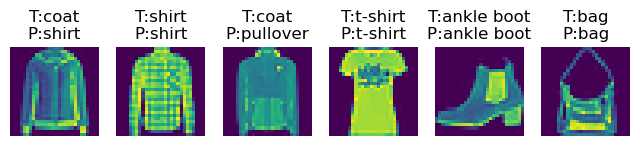

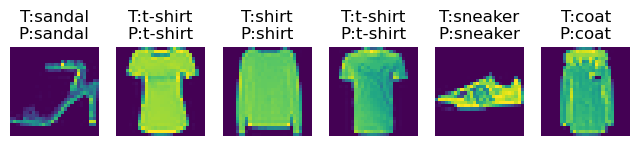

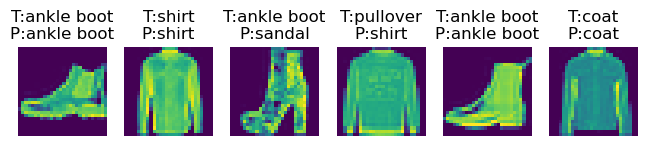

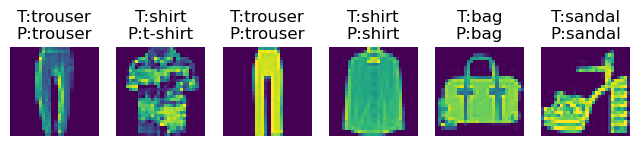

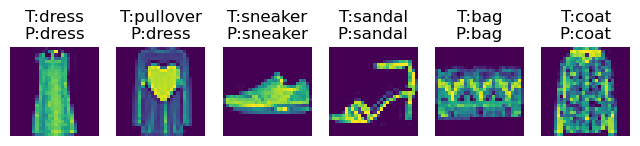

In [1]:
import st_train
from torch import nn
"""
LeNet是用于识别手写数字的卷积神经网络
LeNet结构:
1.输入:28*28图片输入
2.(卷积块)卷积层:6输出通道, 5*5卷积核, 步幅2, 一个sigmoid激活函数 -> 将输入映射到多个二维特征输出,同时增加通道的数量
3.(卷积块)汇聚层:2*2,步幅2的平均池操作,输出14*14
3.(卷积块)卷积层:16输出通道,5*5卷积核, 一个sigmoid激活函数
4.(卷积块)汇聚层:2*2,步幅2的平均池操作,输出5*5
5.(稠密块)全连接层:120个输出
6.(稠密块)全连接层:84个输出
7.(稠密块)全连接层:10个输出,即结果

为了将卷积块的输出传递给稠密块,须在小批量中展平每个样本。
换言之,将这个四维输入转换成全连接层所期望的二维输入。
第一个维度索引是小批量中的样本编号,
第二个维度给出每个样本的平面向量表示。
"""
LeNet = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5), nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16*5*5, 120), nn.Sigmoid(),
    nn.Linear(120,84), nn.Sigmoid(),
    nn.Linear(84,10))

batch_size = 256
learning_rate = 0.9
num_epochs = 32
train_iter, test_iter = st_train.load_MINST_data(batch_size, num_workers=16)
result = st_train.ResVisualization(('train_acc','test_acc','train_loss'), num_epochs)
st_train.train_gpu(LeNet, train_iter, test_iter, num_epochs, learning_rate, st_train.try_gpu(), result)
result.plot_res()
st_train.std_prediction_gpu(LeNet, test_iter, device=st_train.try_gpu())